# **Data Sourcing and Cleaning**

## **1. Importing Libraries and Data**

In [2]:
# Import Libraries:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set path:
path = r'/Users/poojathummar/Documents/career Foundary/Data Immersion/Achi 6 Advanced Analytiics & Dashborad Design/cancer a disease/02 Data'

In [8]:
# Import data:
df = pd.read_csv(os.path.join(path, 'Original Data', 'lung_cancer_mortality_data_large_v2.csv'))

## **2. Initial Data Exploration**

In [11]:
# Check dataframe size
df.shape

(3250000, 18)

In [13]:
#to preview the data 
df.head(10)

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
5,6,50.0,Male,Finland,2023-01-04,Stage II,2023-01-12,Yes,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
6,7,49.0,Male,Denmark,2018-05-23,Stage IV,2018-05-30,No,Former Smoker,30.1,300,1,1,0,1,Chemotherapy,2019-07-07,0
7,8,51.0,Female,France,2017-02-20,Stage II,2017-02-23,Yes,Former Smoker,44.3,244,1,0,0,0,Combined,2018-10-09,0
8,9,64.0,Female,Slovakia,2021-03-23,Stage I,2021-04-03,Yes,Passive Smoker,26.9,161,1,0,0,0,Surgery,2023-02-13,0
9,10,56.0,Male,Hungary,2021-12-02,Stage III,2021-12-04,Yes,Passive Smoker,40.9,286,1,1,0,0,Chemotherapy,2023-07-07,1


In [15]:
# to chehck statistical
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06,3.250000e+06
mean,1.625000e+06,5.499969e+01,3.049276e+01,2.336376e+02,7.498375e-01,4.687280e-01,2.265831e-01,8.802738e-02,2.196006e-01
std,9.381943e+05,1.000122e+01,8.371494e+00,4.344851e+01,4.331065e-01,4.990212e-01,4.186206e-01,2.833348e-01,4.139761e-01
min,1.000000e+00,4.000000e+00,1.600000e+01,1.500000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.125008e+05,4.800000e+01,2.320000e+01,1.960000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.625000e+06,5.500000e+01,3.050000e+01,2.420000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.437500e+06,6.200000e+01,3.770000e+01,2.710000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.250000e+06,1.040000e+02,4.500000e+01,3.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


* Columns Age, bmi, and cholesterol_level appear to be within realistic ranges
* All binary options either 0 or 1
* No missing values 

* Average BMI is on the high end (according to the National Institute for Health) but the average BMI for each country      may simply be high as well
* Average cholesterol is considered to be within a healthy range 
* Seemingly high incidence of hypertension (74.98%) and asthma (46.87%)
* Cirrhosis (22.66%), Other cancer (8.80%)
* Survival rate (21.96%)

--------------

Text(0.5, 1.0, 'Survived?')

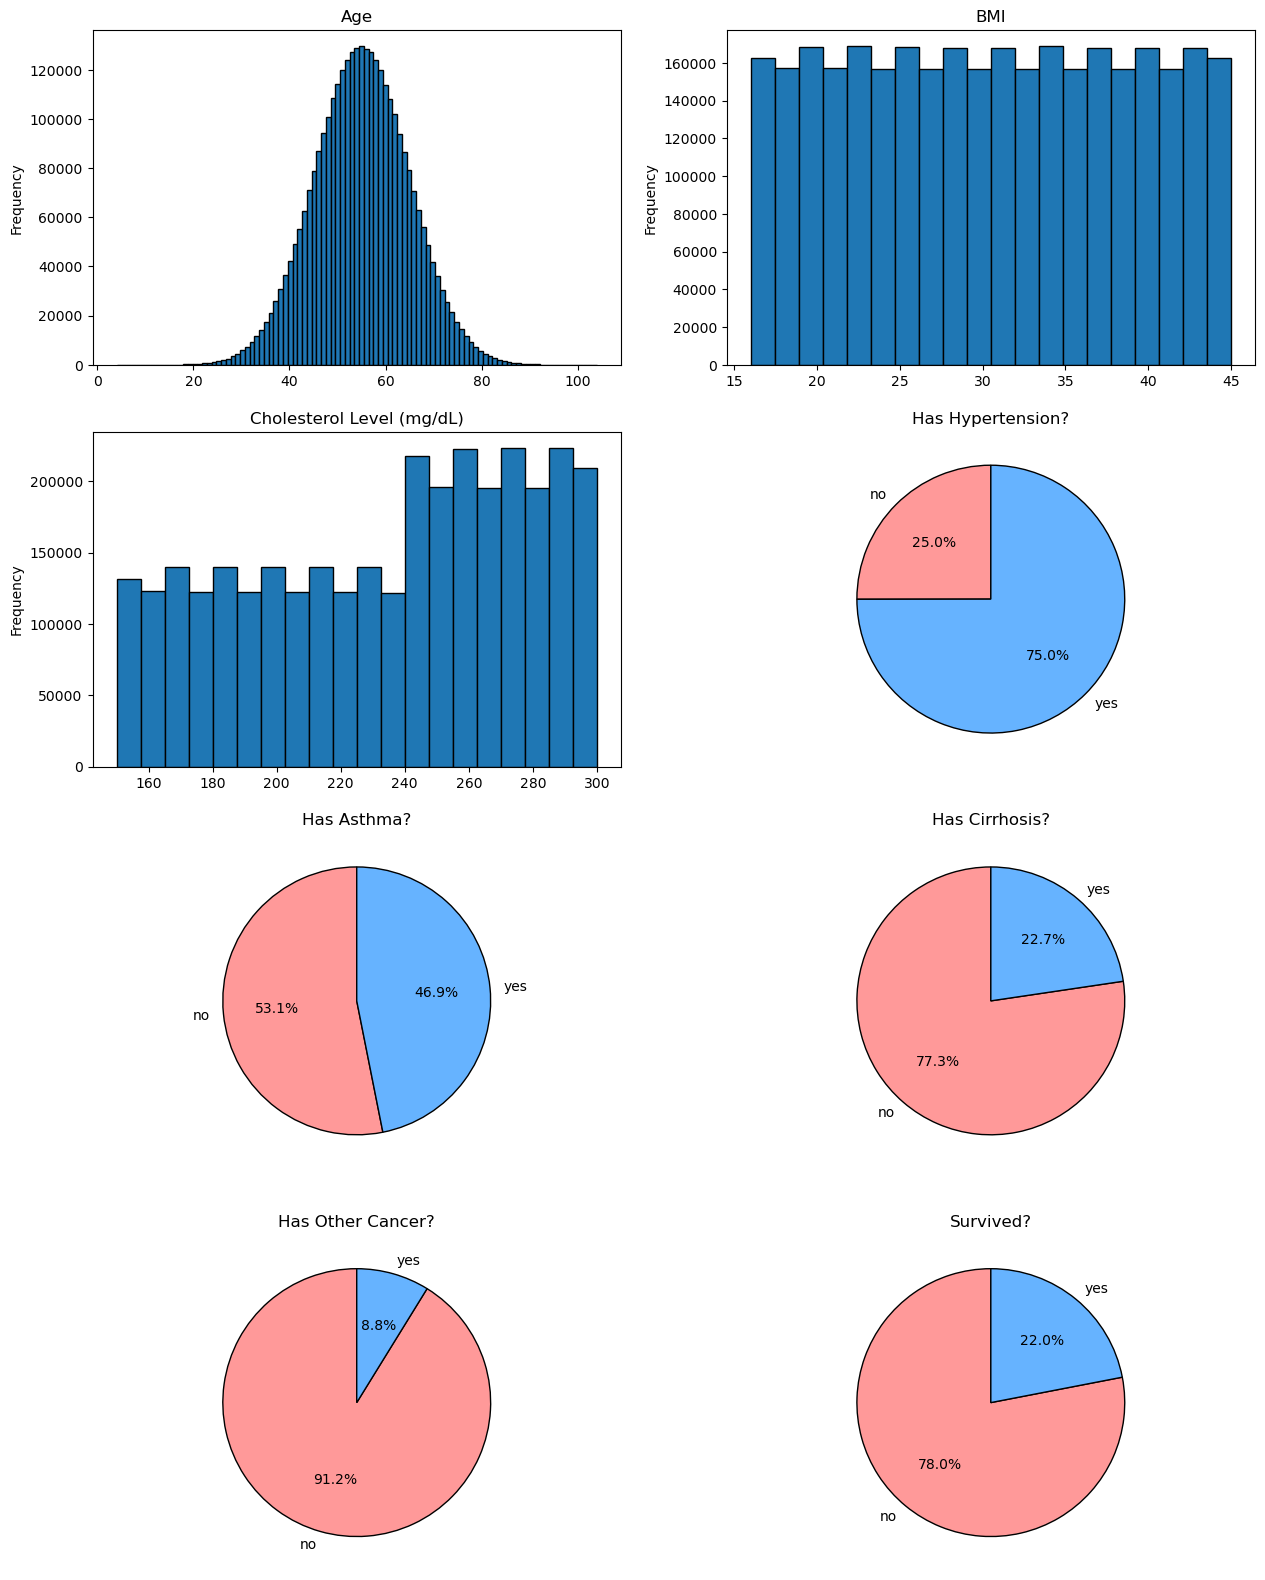

In [18]:
# Visualise this data:
fig, axes = plt.subplots(4, 2, figsize=(15,20)) # 4 rows and 2 columns
axes = axes.flatten() # flatten the 2D array of axes

# Plot age, bmi, and cholesterol levels as histograms
axes[0].hist(df['age'], bins=101, edgecolor='black')
axes[0].set_title('Age')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['bmi'], bins=20, edgecolor='black')
axes[1].set_title('BMI')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['cholesterol_level'], bins=20, edgecolor='black')
axes[2].set_title('Cholesterol Level (mg/dL)')
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

# For the binary variables, I'll take pie charts
colors = ['#ff9999', '#66b3ff'] # Set colours for yes and no
label_mapping = {0: 'no', 1: 'yes'} # Create a mapping for binary labels

# Hypertension Pie
hypertension_counts = df['hypertension'].value_counts().sort_index() #sorted index to align pie chart color with labels
hypertension_labels = [label_mapping[key] for key in hypertension_counts.index]
axes[3].pie(hypertension_counts, labels=hypertension_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[3].set_title('Has Hypertension?')

# Asthma Pie
asthma_counts = df['asthma'].value_counts()
asthma_labels = [label_mapping[key] for key in asthma_counts.index]
axes[4].pie(asthma_counts, labels=asthma_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[4].set_title('Has Asthma?')

# Cirrhosis Pie
cirrhosis_counts = df['cirrhosis'].value_counts()
cirrhosis_labels = [label_mapping[key] for key in cirrhosis_counts.index]
axes[5].pie(cirrhosis_counts, labels=cirrhosis_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[5].set_title('Has Cirrhosis?')

 # Other Cancer Pie
other_cancer_counts = df['other_cancer'].value_counts()
other_cancer_labels = [label_mapping[key] for key in other_cancer_counts.index]
axes[6].pie(other_cancer_counts, labels=other_cancer_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[6].set_title('Has Other Cancer?')

# Survived Pie
survived_counts = df['survived'].value_counts()
survived_labels = [label_mapping[key] for key in survived_counts.index]
axes[7].pie(survived_counts, labels=survived_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[7].set_title('Survived?')

* Age is normally distributed
* BMI and cholesterol level are a bit suspect (likely an issue with the way this data way generated)
* Hypertension is an obvious point of concern
* Need to conduct outside research to determine how common asthma and cirrhosis is within European countries
* Need to conduct outside research to determine if these survival rates are similar outside Europe.

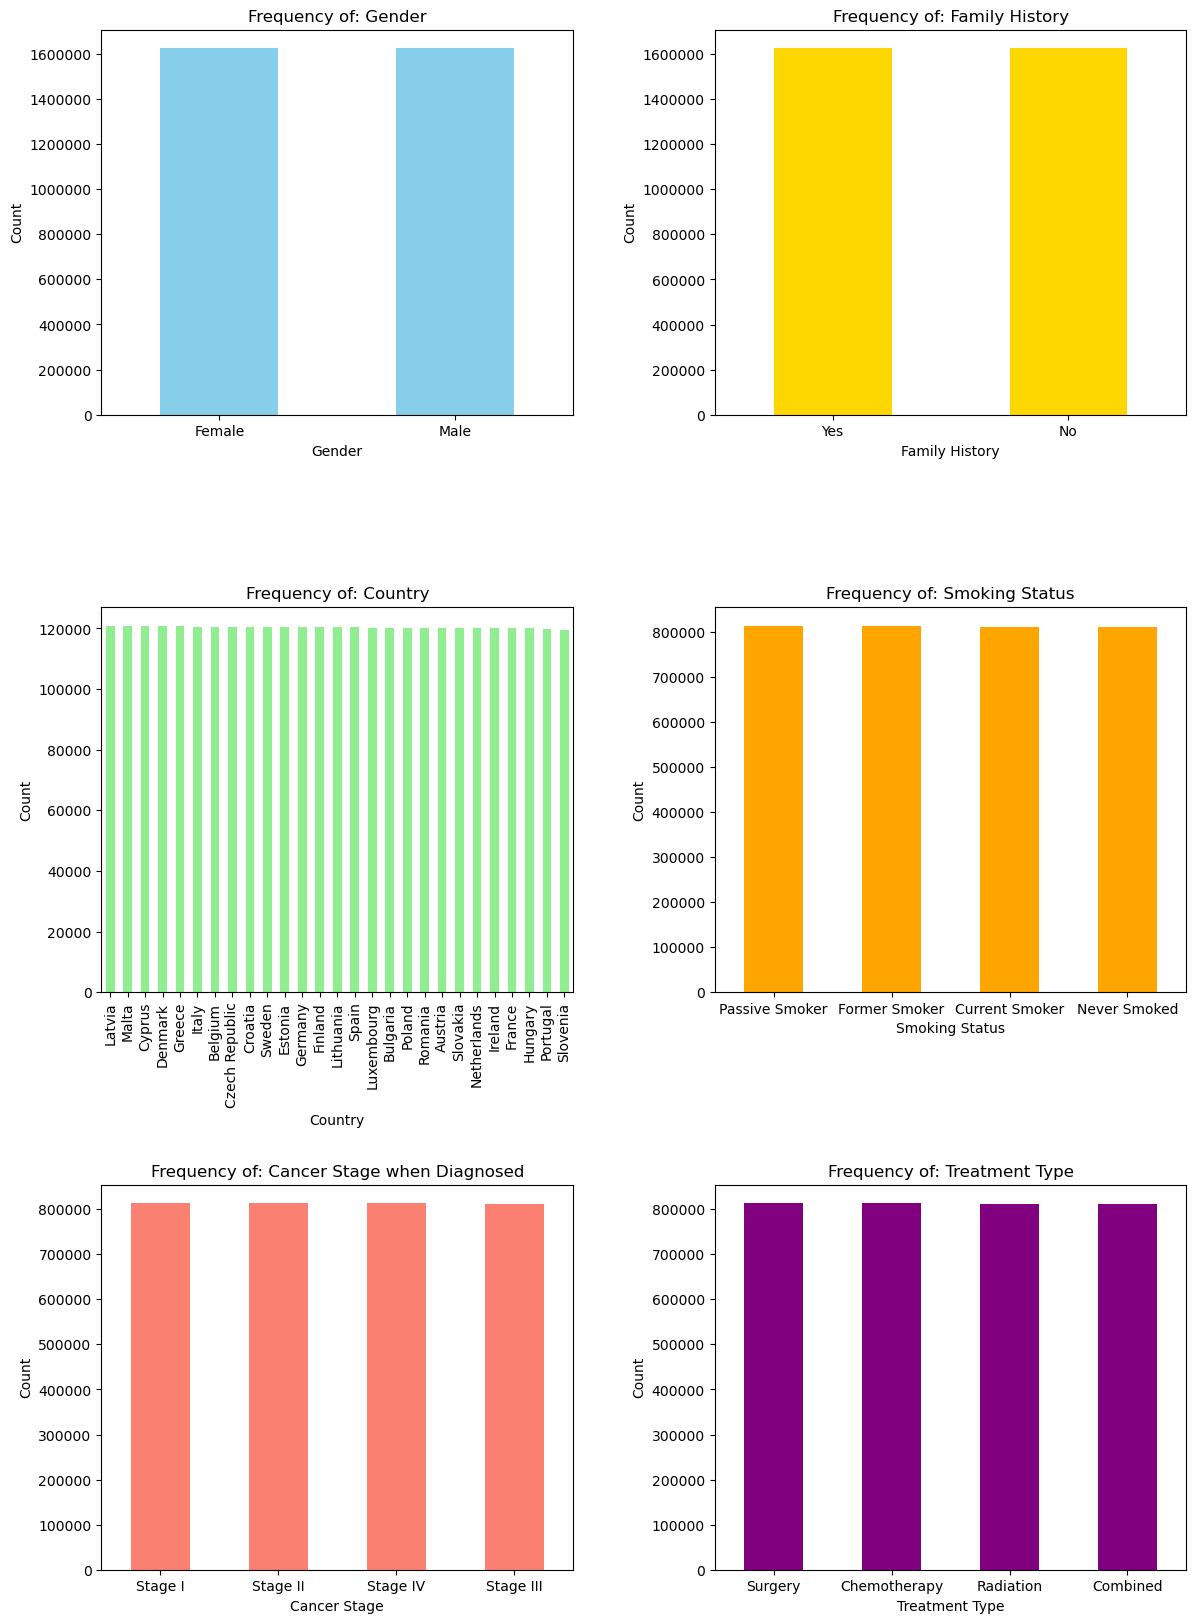

In [21]:
# Shift focus to categorical variables and their distributions:
fig, axes = plt.subplots(3, 2, figsize=(14,20)) # 3 rows and 2 columns

# Plot for Gender

gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Frequency of: Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Plot for Country

country_counts = df['country'].value_counts()
country_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Frequency of: Country')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Cancer Stage

cancer_stage_counts = df['cancer_stage'].value_counts()
cancer_stage_counts.plot(kind='bar', ax=axes[2, 0], color='salmon')
axes[2, 0].set_title('Frequency of: Cancer Stage when Diagnosed')
axes[2, 0].set_xlabel('Cancer Stage')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=0)
axes[2, 0].ticklabel_format(style='plain', axis='y')

# Family History

family_history_counts = df['family_history'].value_counts()
family_history_counts.plot(kind='bar', ax=axes[0, 1], color='gold')
axes[0, 1].set_title('Frequency of: Family History')
axes[0, 1].set_xlabel('Family History')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Smoking Status

smoking_status_counts = df['smoking_status'].value_counts()
smoking_status_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Frequency of: Smoking Status')
axes[1, 1].set_xlabel('Smoking Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].ticklabel_format(style='plain', axis='y')

# Treatment Type

treatment_type_counts = df['treatment_type'].value_counts()
treatment_type_counts.plot(kind='bar', ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Frequency of: Treatment Type')
axes[2, 1].set_xlabel('Treatment Type')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=0)
axes[2, 1].ticklabel_format(style='plain', axis='y')

# Adjust layout to increase spacing
plt.subplots_adjust(wspace=0.3, hspace=0.5)

## **3. Data Checks/Cleaning**

### 3.1 Missing Values

In [9]:
df.isnull().sum()

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

No missing values

### 3.2 Duplicates

In [23]:
df.duplicated().sum()

0

##### There is no duplication value.
-------

### 3.3 Drop Columns

In [28]:
# i think id column is not  required for analysis
df.drop('id', axis=1, inplace=True)

In [30]:
# Check to ensure column was dropped
df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


### 3.4 Data Types

In [34]:
for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len (df[weird]) > 0:
             print(f'{col} is mixed')
    else: print(f'everything fine in {col} column')

everything fine in age column
everything fine in gender column
everything fine in country column
everything fine in diagnosis_date column
everything fine in cancer_stage column
everything fine in beginning_of_treatment_date column
everything fine in family_history column
everything fine in smoking_status column
everything fine in bmi column
everything fine in cholesterol_level column
everything fine in hypertension column
everything fine in asthma column
everything fine in cirrhosis column
everything fine in other_cancer column
everything fine in treatment_type column
everything fine in end_treatment_date column
everything fine in survived column


In [36]:
# Get Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   age                          float64
 1   gender                       object 
 2   country                      object 
 3   diagnosis_date               object 
 4   cancer_stage                 object 
 5   beginning_of_treatment_date  object 
 6   family_history               object 
 7   smoking_status               object 
 8   bmi                          float64
 9   cholesterol_level            int64  
 10  hypertension                 int64  
 11  asthma                       int64  
 12  cirrhosis                    int64  
 13  other_cancer                 int64  
 14  treatment_type               object 
 15  end_treatment_date           object 
 16  survived                     int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 421.5+ MB


###### * I will make changes to data types for the sake of memory usage as well as for the upcoming analyses.
 ------

In [39]:
# chenging data type  from object to datetime:
date_columns = ['diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [41]:
# Make 'int' and 'float' columns smaller
df['age'] = df['age'].astype('int8')
df['bmi'] = df['bmi'].astype('float16')
df['cholesterol_level'] = df['cholesterol_level'].astype('int16')

In [47]:
# Use 'Bool' for all columns where appropriate (especially those using 0's and 1's)
columns_to_change = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

for col in columns_to_change:
    df[col] = df[col].astype('bool')

In [49]:
# Family history column can also be converted to bool since its values are yes and no
df['family_history'] = df['family_history'].replace({'Yes' : True, 'No' : False}).astype('bool')

In [53]:
# to ensure data types changed well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250000 entries, 0 to 3249999
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   age                          int8          
 1   gender                       object        
 2   country                      object        
 3   diagnosis_date               datetime64[ns]
 4   cancer_stage                 object        
 5   beginning_of_treatment_date  datetime64[ns]
 6   family_history               bool          
 7   smoking_status               object        
 8   bmi                          float16       
 9   cholesterol_level            int16         
 10  hypertension                 bool          
 11  asthma                       bool          
 12  cirrhosis                    bool          
 13  other_cancer                 bool          
 14  treatment_type               object        
 15  end_treatment_date           datetime64[ns]
 16  

### 3.5 Datetime Checks

In [55]:
# Check ranges in datetime columns:
for col in date_columns:
    min_date = df[col].min()
    max_date = df[col].max()
    print(f"Date range for {col}: {min_date} to {max_date}")

Date range for diagnosis_date: 2014-06-04 00:00:00 to 2024-06-01 00:00:00
Date range for beginning_of_treatment_date: 2014-06-05 00:00:00 to 2024-07-01 00:00:00
Date range for end_treatment_date: 2014-12-05 00:00:00 to 2026-06-01 00:00:00


##### - The date range for end_treatment_date is concerning. Although the data is artifically generated (and this could be seen as a predicted date for the end of a patient's treatment), for the purposes of data cleaning practices, I am going to assume this data is erroneous and should be removed as it would affect the analysis.
----------

In [77]:
# Define cutoff date as 1st of June 2024
cutoff_date = pd.Timestamp('2024-06-01')

filtered_df = df[df['end_treatment_date'] <= cutoff_date]

In [79]:
# Check new date ranges

for col in date_columns:
    min_date = filtered_df[col].min()
    max_date = filtered_df[col].max()
    print(f"Date range for {col}: {min_date} to {max_date}")

Date range for diagnosis_date: 2014-06-04 00:00:00 to 2023-12-01 00:00:00
Date range for beginning_of_treatment_date: 2014-06-05 00:00:00 to 2023-12-15 00:00:00
Date range for end_treatment_date: 2014-12-05 00:00:00 to 2024-06-01 00:00:00


Text(0, 0.5, 'Frequency')

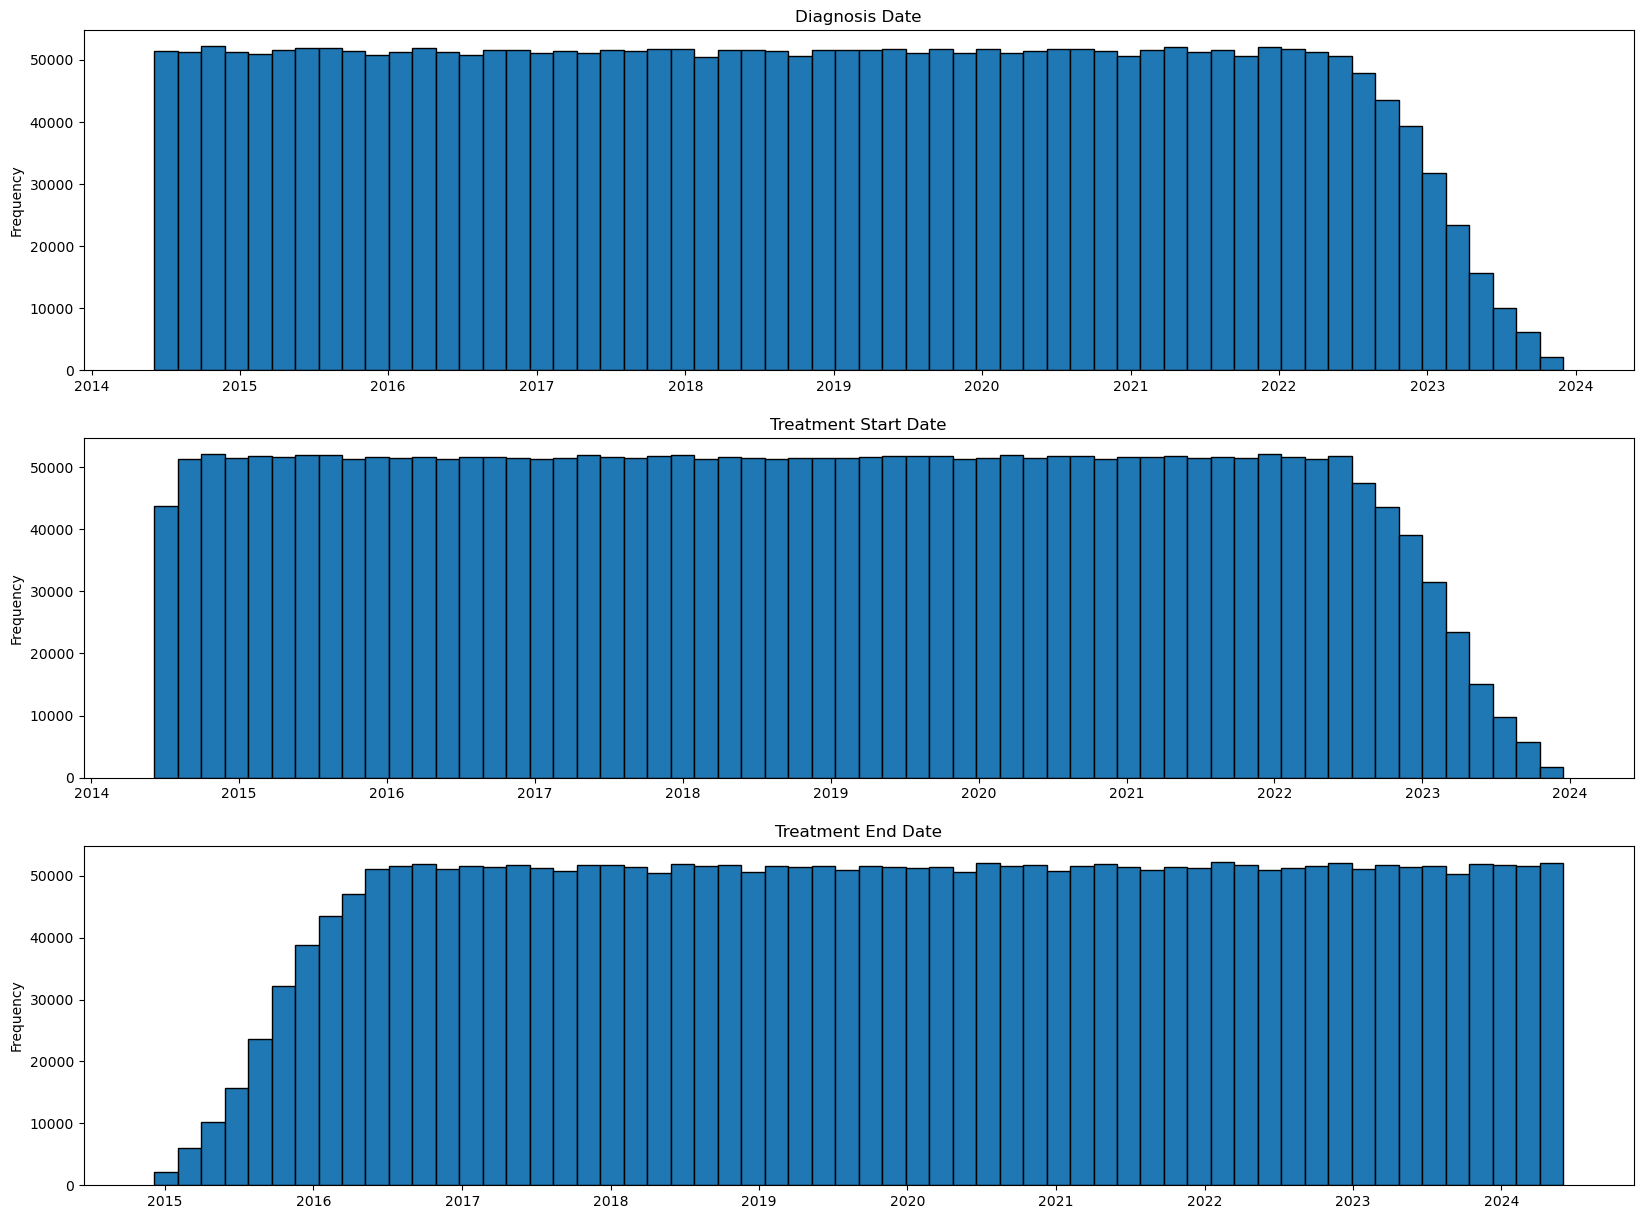

In [81]:
# Finally, I want to check the distribution of the datetime variables
fig, axes = plt.subplots(3, 1, figsize=(20,15))
axes = axes.flatten() # flatten the 2D array of axes

axes[0].hist(filtered_df['diagnosis_date'], bins=60, edgecolor='black')
axes[0].set_title('Diagnosis Date')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

axes[1].hist(filtered_df['beginning_of_treatment_date'], bins=60, edgecolor='black')
axes[1].set_title('Treatment Start Date')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

axes[2].hist(filtered_df['end_treatment_date'], bins=60, edgecolor='black')
axes[2].set_title('Treatment End Date')
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

- Essentially, by removing all columns where the end treatment date was after the 1st of June 2024, I have narrowed the focus on patients that have had  end outcome. So the diagnosis numbers trail off after 2022 because some patients diagnosed after this time have not seen an end result in their treatment.

- Similarly, treatment end dates rise between 2015 and 2016 because only patients diagnosed after the 4th of June 2014 have been recorded for this data.

In [100]:
filtered_df['chronologically_sound'].value_counts(dropna=False)

chronologically_sound
True    2842404
Name: count, dtype: int64

In [102]:

filtered_df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True
3,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True
5,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True
6,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True


### 3.6 Outliers

In [104]:
# Using the IQR method:

def find_outliers(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return df.loc[outlier_indices]

This will be applied to only relevant columns (numerical): Age, BMI, Cholesterol Level

In [107]:
age_outliers = find_outliers(filtered_df, 'age')
age_outliers.sort_values('age')

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound
395903,4,Male,Sweden,2020-08-02,Stage IV,2020-08-09,True,Passive Smoker,29.796875,223,True,True,False,False,Combined,2021-12-15,True,True
175127,7,Male,Czech Republic,2015-09-02,Stage III,2015-09-13,True,Never Smoked,26.703125,166,True,True,False,False,Chemotherapy,2016-09-15,False,True
611454,7,Male,Estonia,2023-01-10,Stage I,2023-01-16,False,Passive Smoker,35.093750,296,True,False,False,False,Radiation,2023-09-01,True,True
2699796,7,Male,Slovakia,2017-03-05,Stage I,2017-04-02,True,Passive Smoker,36.000000,297,True,True,False,False,Radiation,2018-08-17,True,True
732666,8,Female,Luxembourg,2021-02-14,Stage I,2021-03-13,False,Passive Smoker,33.906250,293,True,False,True,True,Combined,2022-03-02,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111496,100,Male,Greece,2014-09-03,Stage II,2014-09-05,True,Former Smoker,36.500000,247,True,False,False,True,Surgery,2016-04-06,False,True
2714809,100,Male,Ireland,2015-07-12,Stage I,2015-08-02,True,Passive Smoker,40.906250,297,True,True,False,False,Radiation,2016-09-03,False,True
2821924,101,Male,Poland,2019-04-14,Stage IV,2019-04-17,True,Current Smoker,41.500000,267,False,True,False,False,Chemotherapy,2019-10-23,False,True
1567977,101,Female,Romania,2015-09-22,Stage II,2015-10-11,True,Former Smoker,23.703125,238,True,False,False,False,Radiation,2017-02-18,False,True


- Although outliers have been detected, they should not be removed since this reflects natural variations in the population (age is normally distributed in populations and in this dataset - as shown in the initial data exploration)

In [109]:
bmi_outliers = find_outliers(filtered_df, 'bmi')
bmi_outliers

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound


In [111]:
cholesterol_level_outliers = find_outliers(filtered_df, 'cholesterol_level')
cholesterol_level_outliers

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound


### 3.7 Changing Column Names

In [113]:
filtered_df.rename(columns = {"beginning_of_treatment_date" : "start_treatment_date"})

,age,gender,country,diagnosis_date,cancer_stage,start_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.093750,257,True,True,False,False,Combined,2017-11-15,False,True
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.906250,208,True,False,False,False,Radiation,2024-04-25,False,True
3,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.593750,249,True,True,True,False,Surgery,2017-04-14,True,True
5,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.593750,300,True,True,False,False,Radiation,2024-03-11,False,True
6,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.093750,300,True,True,False,True,Chemotherapy,2019-07-07,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249995,45,Male,Poland,2020-03-11,Stage IV,2020-03-18,False,Current Smoker,31.000000,273,True,True,False,False,Chemotherapy,2020-11-26,True,True
3249996,51,Male,Italy,2016-11-16,Stage IV,2016-11-22,True,Current Smoker,41.187500,279,True,True,False,False,Surgery,2018-04-10,False,True
3249997,45,Male,Finland,2021-07-18,Stage III,2021-07-30,True,Current Smoker,18.203125,187,True,True,False,False,Combined,2022-03-16,False,True
3249998,45,Male,Hungary,2020-07-25,Stage I,2020-07-30,False,Passive Smoker,40.187500,271,True,False,False,False,Surgery,2022-02-28,False,True


## **4. Final Exploration of Data**

In [115]:
# Check shape
filtered_df.shape

(2842404, 18)

In [118]:
# Check layout and columns
filtered_df.head(10)

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,chronologically_sound
0,64,Female,Germany,2016-04-07,Stage III,2016-04-21,False,Never Smoked,31.09375,257,True,True,False,False,Combined,2017-11-15,False,True
1,50,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,True,Passive Smoker,25.90625,208,True,False,False,False,Radiation,2024-04-25,False,True
3,51,Female,Latvia,2016-02-07,Stage III,2016-02-13,True,Former Smoker,34.59375,249,True,True,True,False,Surgery,2017-04-14,True,True
5,50,Male,Finland,2023-01-04,Stage II,2023-01-12,True,Never Smoked,32.59375,300,True,True,False,False,Radiation,2024-03-11,False,True
6,49,Male,Denmark,2018-05-23,Stage IV,2018-05-30,False,Former Smoker,30.09375,300,True,True,False,True,Chemotherapy,2019-07-07,False,True
7,51,Female,France,2017-02-20,Stage II,2017-02-23,True,Former Smoker,44.31250,244,True,False,False,False,Combined,2018-10-09,False,True
8,64,Female,Slovakia,2021-03-23,Stage I,2021-04-03,True,Passive Smoker,26.90625,161,True,False,False,False,Surgery,2023-02-13,False,True
9,56,Male,Hungary,2021-12-02,Stage III,2021-12-04,True,Passive Smoker,40.90625,286,True,True,False,False,Chemotherapy,2023-07-07,True,True
11,47,Female,Portugal,2019-11-20,Stage II,2019-11-23,True,Passive Smoker,33.00000,266,True,False,False,False,Chemotherapy,2021-02-13,False,True
13,56,Male,Netherlands,2022-08-09,Stage III,2022-08-15,False,Current Smoker,17.90625,211,True,True,False,True,Combined,2023-09-27,False,True


Text(0.5, 1.0, 'Survived?')

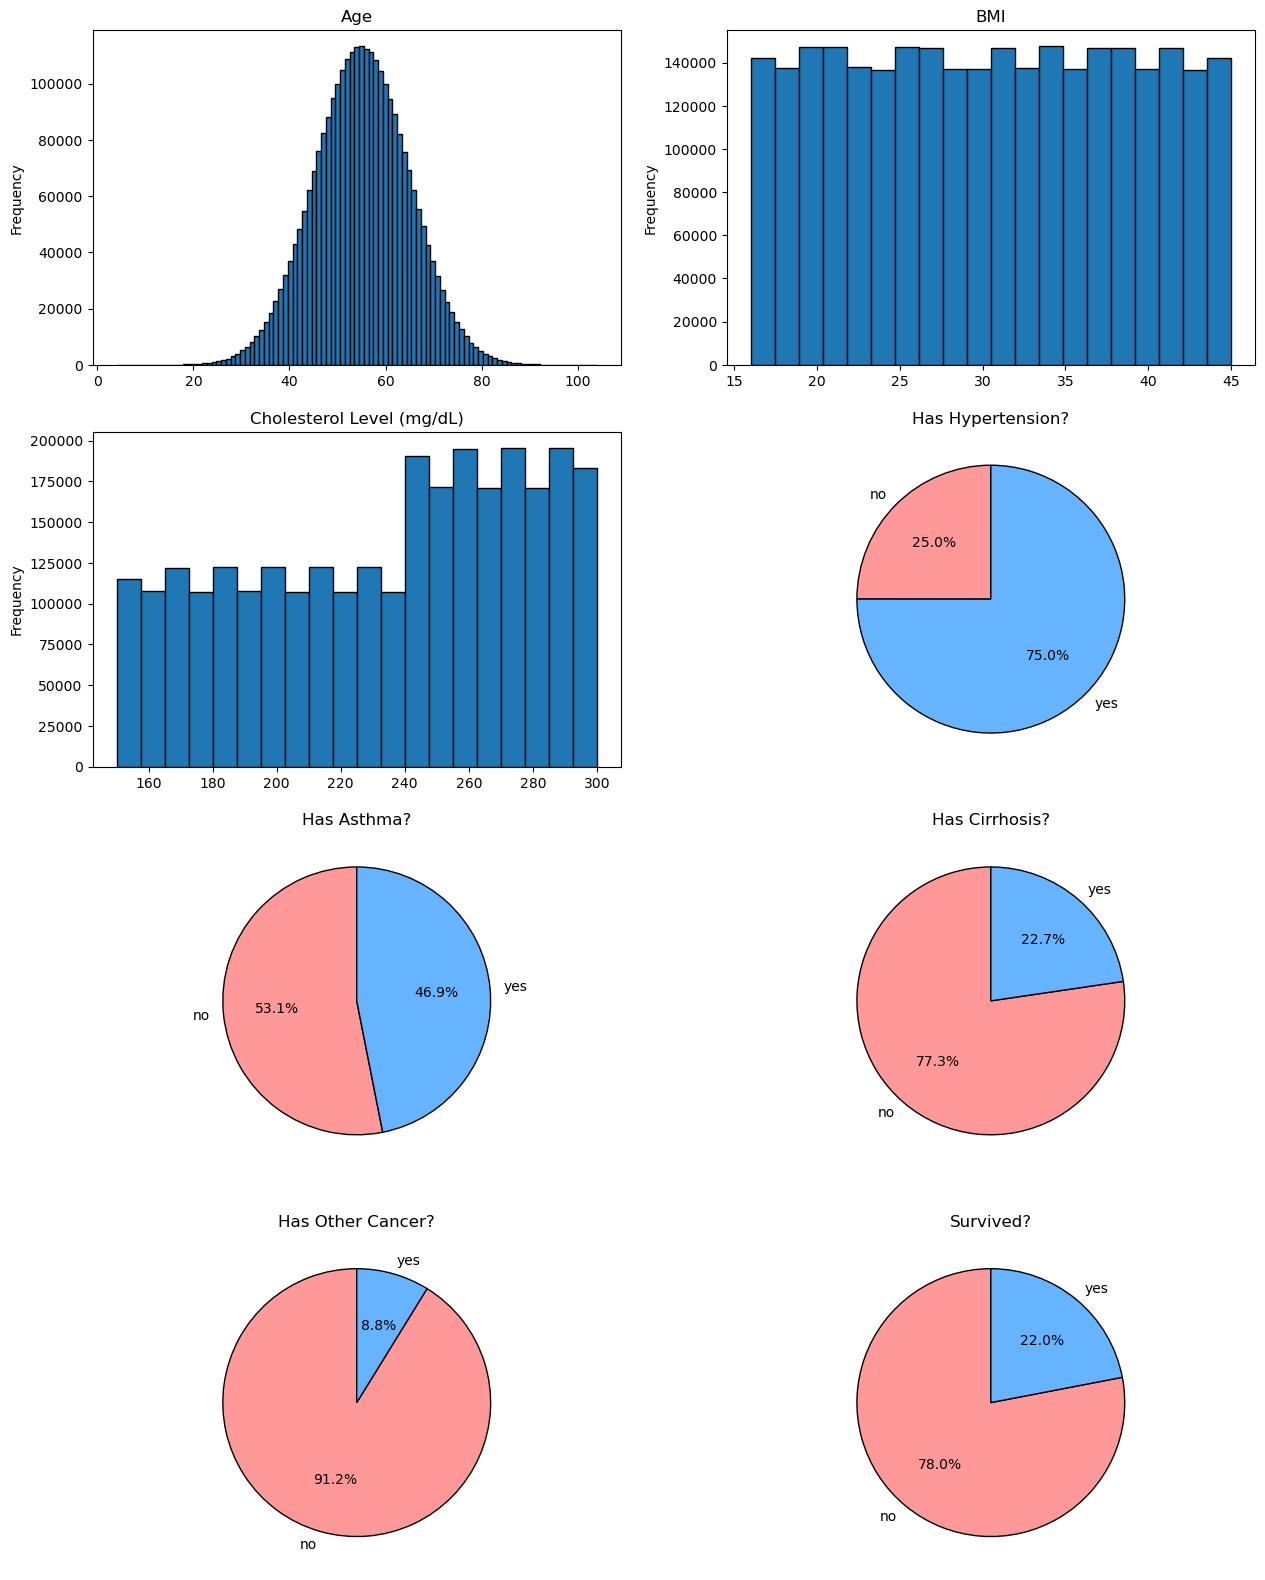

In [124]:
# Visualise filtered data:
fig, axes = plt.subplots(4, 2, figsize=(15,20)) # 4 rows and 2 columns
axes = axes.flatten() # flatten the 2D array of axes

# Plot age, bmi, and cholesterol levels as histograms
axes[0].hist(filtered_df['age'], bins=101, edgecolor='black')
axes[0].set_title('Age')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

axes[1].hist(filtered_df['bmi'], bins=20, edgecolor='black')
axes[1].set_title('BMI')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

axes[2].hist(filtered_df['cholesterol_level'], bins=20, edgecolor='black')
axes[2].set_title('Cholesterol Level (mg/dL)')
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')

# For the binary variables, I'll take pie charts
colors = ['#ff9999', '#66b3ff'] # Set colours for yes and no
label_mapping = {0: 'no', 1: 'yes'} # Create a mapping for binary labels

# Hypertension Pie
hypertension_counts = filtered_df['hypertension'].value_counts().sort_index() #sorted index to align pie chart color with labels
hypertension_labels = [label_mapping[key] for key in hypertension_counts.index]
axes[3].pie(hypertension_counts, labels=hypertension_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[3].set_title('Has Hypertension?')

# Asthma Pie
asthma_counts = filtered_df['asthma'].value_counts()
asthma_labels = [label_mapping[key] for key in asthma_counts.index]
axes[4].pie(asthma_counts, labels=asthma_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[4].set_title('Has Asthma?')

# Cirrhosis Pie
cirrhosis_counts = filtered_df['cirrhosis'].value_counts()
cirrhosis_labels = [label_mapping[key] for key in cirrhosis_counts.index]
axes[5].pie(cirrhosis_counts, labels=cirrhosis_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[5].set_title('Has Cirrhosis?')

 # Other Cancer Pie
other_cancer_counts = filtered_df['other_cancer'].value_counts()
other_cancer_labels = [label_mapping[key] for key in other_cancer_counts.index]
axes[6].pie(other_cancer_counts, labels=other_cancer_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[6].set_title('Has Other Cancer?')

# Survived Pie
survived_counts = filtered_df['survived'].value_counts()
survived_labels = [label_mapping[key] for key in survived_counts.index]
axes[7].pie(survived_counts, labels=survived_labels, autopct='%1.1f%%', startangle=90, colors=colors,
            wedgeprops = {"edgecolor" : 'black'})
axes[7].set_title('Survived?')

- No major changes compared to before

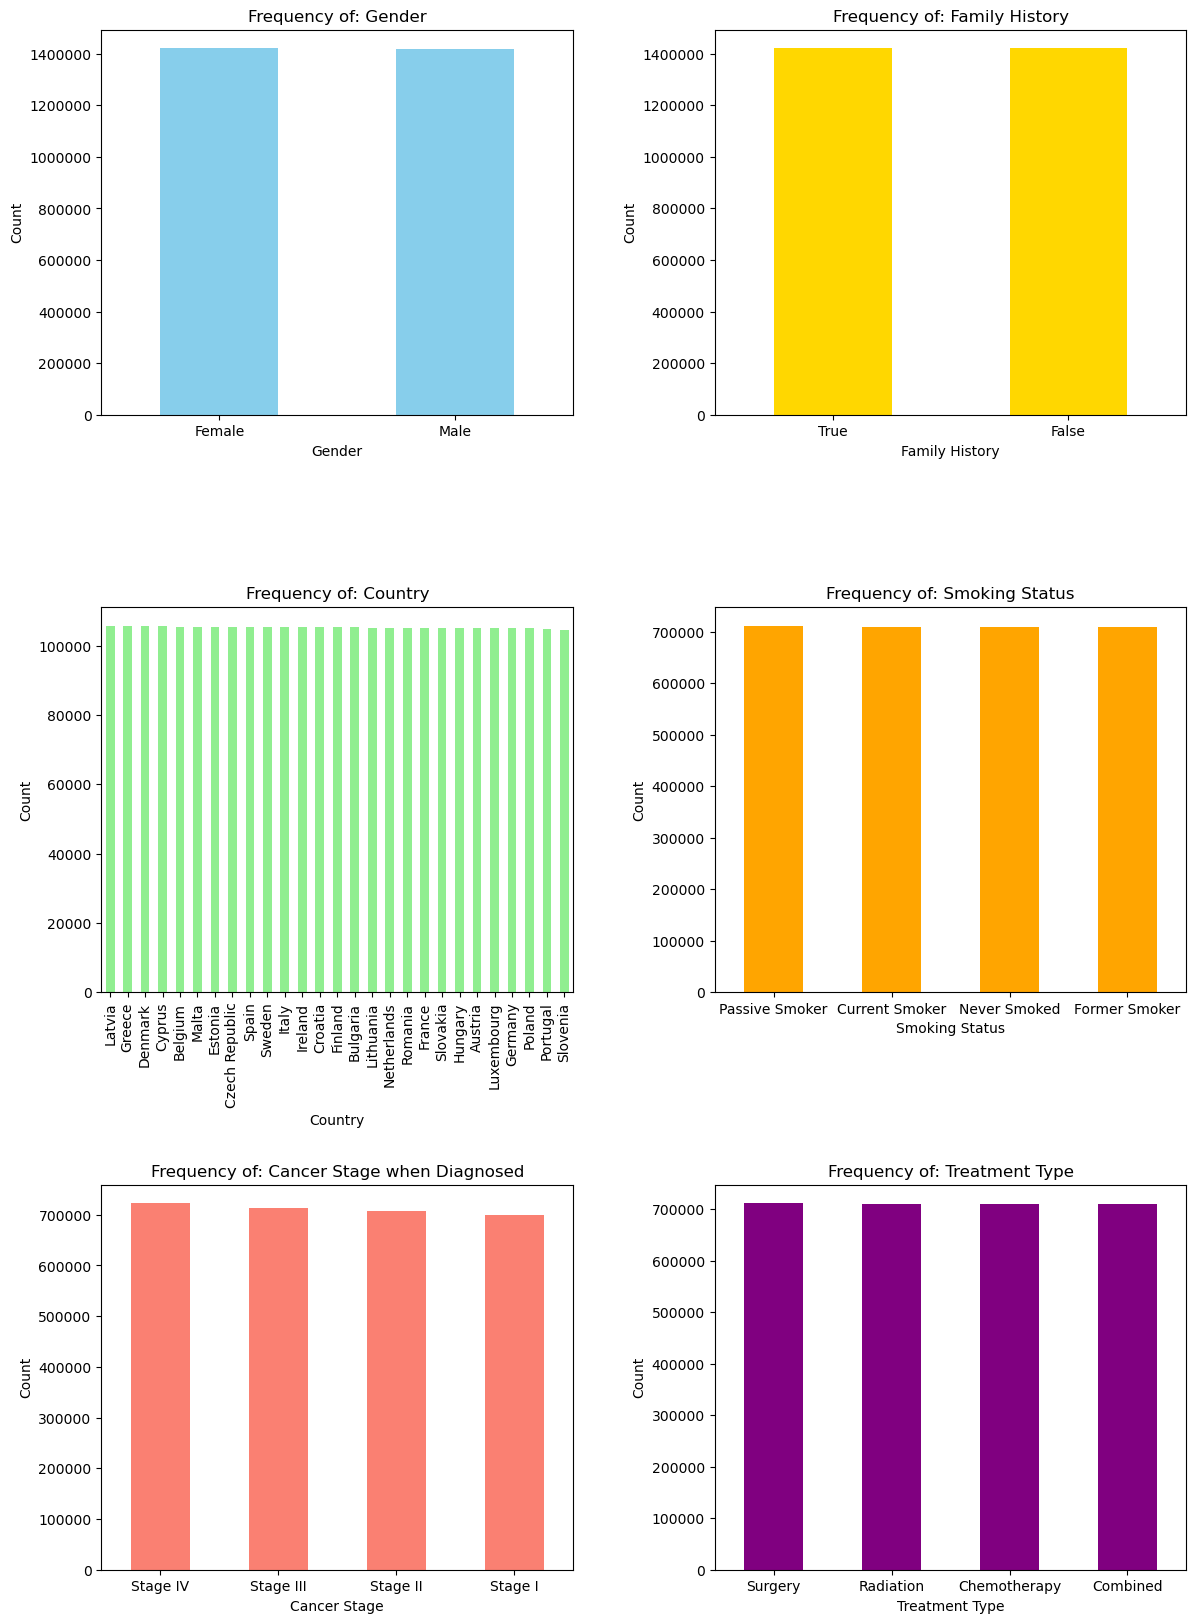

In [127]:
# Shift focus to categorical variables and their distributions:
fig, axes = plt.subplots(3, 2, figsize=(14,20)) # 3 rows and 2 columns

# Plot for Gender

gender_counts = filtered_df['gender'].value_counts()
gender_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Frequency of: Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Plot for Country

country_counts = filtered_df['country'].value_counts()
country_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Frequency of: Country')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Cancer Stage

cancer_stage_counts = filtered_df['cancer_stage'].value_counts()
cancer_stage_counts.plot(kind='bar', ax=axes[2, 0], color='salmon')
axes[2, 0].set_title('Frequency of: Cancer Stage when Diagnosed')
axes[2, 0].set_xlabel('Cancer Stage')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=0)
axes[2, 0].ticklabel_format(style='plain', axis='y')

# Family History

family_history_counts = filtered_df['family_history'].value_counts()
family_history_counts.plot(kind='bar', ax=axes[0, 1], color='gold')
axes[0, 1].set_title('Frequency of: Family History')
axes[0, 1].set_xlabel('Family History')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Smoking Status

smoking_status_counts = filtered_df['smoking_status'].value_counts()
smoking_status_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Frequency of: Smoking Status')
axes[1, 1].set_xlabel('Smoking Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].ticklabel_format(style='plain', axis='y')

# Treatment Type

treatment_type_counts = filtered_df['treatment_type'].value_counts()
treatment_type_counts.plot(kind='bar', ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Frequency of: Treatment Type')
axes[2, 1].set_xlabel('Treatment Type')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=0)
axes[2, 1].ticklabel_format(style='plain', axis='y')

# Adjust layout to increase spacing
plt.subplots_adjust(wspace=0.3, hspace=0.5)

- All categorical variables seem evenly split. This brought up concerns which were discussed with multiple supervisors/mentors. However, it was considered to be fine for the purposes of this project and may evenly lead to interesting insights later on.

## **5. Export Data**

In [130]:
# Export as pickle file since there are more than 1,048,576 rows
filtered_df.to_pickle(os.path.join(path, "Prepared Data", "Cleaned_lung_cancer_mortality_data.pkl"))